___

# GUÍA METODOLÓGICA DE ACÁMICA
___
## Proyecto 03 Aplicaciones actuales
## Resumen del proyecto
¡Aplica Procesamiento del Lenguaje Natural, Sistemas de Recomendación y **Series de Tiempo** para resolver problemas de relevancia contemporánea!

La realización y entrega del Proyecto es individual.

## Entregables
Un Notebook de Jupyter con la resolución de la consigna. El Notebook debe poder ejecutarse sin errores. En el notebook debe estar el link al repositorio (por ejemplo, de GitHub) donde se pueda encontrar el proyecto entregado.

## Referencias
Apóyate en las bitácoras, los notebooks trabajados y las presentaciones vistas en clase para resolver tu proyecto. También será de mucha utilidad la documentación de las librerías de Python. No dudes en consultar comunidades online como Stack Overflow y, por supuesto, buscar en la web (googlear).

## Consigna

Elige una de las tres opciones de aplicación para elaborar tu proyecto. El objetivo es que apliques las herramientas aprendidas en el dominio que hayas seleccionado. Verás que para cualquiera de las opciones, el trabajo se organiza en tres partes:

* **Parte A** - *Exploración de Datos*: Todo proyecto de Ciencia de Datos empieza con un Análisis Exploratorio de Datos. Y todo Análisis Exploratorio de Datos debe responder preguntas.
* **Parte B** - *Modelo de Machine Learning*: En esta sección deberás aplicar las técnicas de Machine Learning aprendidas para crear un modelo predictivo a partir del dataset provisto.
* **Parte C** - *Investigación*: Las preguntas y cosas para probar nunca se agotan. El objetivo de esta sección es que sugieras cómo continuarías el proyecto, con el fin de mejorar el modelo o responder una pregunta que consideres interesante. En todos los notebooks dejamos algunas sugerencias, pero puedes proponer otras.

## Checklist de evaluación

Sugerencias para desarrollar el proyecto:

La resolución del proyecto te puede enfrentar a desafíos que no trabajamos durante los encuentros. Es importante que desarrolles la capacidad de resolverlos. Para ello, consulta las bitácoras, las referencias, los notebooks vistos en clase, la documentación de la librería y, sobre todo, googlea.

* Los pasos deben estar correctamente justificados.
* Las preguntas que se respondan deben estar correctamente explicitadas.
* Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.

Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores. Además, asegúrate de cumplir con las siguientes condiciones (son las que los/as evaluadores/as tendrán en consideración al momento de corregir tu trabajo):

**Parte A - Exploración de Datos**

* El Análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga.
* Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.

**Parte B - Modelo de Machine Learning**

* Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada y justificar su elección, y comparar los resultados contra un modelo benchmark.
* Puedes aplicar más de una de las técnicas vistas para crear tus modelos. Pero ten en cuenta que es preferible un modelo bien hecho (apropiada transformación de datos, optimización de hiperparámetros y análisis de sus resultados) que muchos modelos a medias. En caso de entrenar más de un modelo, debes comparar sus resultados y justificar cuál elegirías.
* Si el modelo lo permite, debes explorar qué información utiliza para predecir e interpretar ese resultado. ¿Coincide con lo que esperabas a partir de tu experiencia con el dataset?

**Parte C - Investigación**

* Debes explicar qué te gustaría probar, por qué y cómo lo harías. Si tienes referencias (por ejemplo, un artículo que hayas encontrado, capítulo de libro, etc.), debes mencionarlas.
* Debes comentar también qué resultados esperas encontrar. Por ejemplo, puedes implementar una prueba rápida y mostrar resultados preliminares, para ver si estás correctamente orientado.
___
___

# PROYECTO 3: ANÁLISIS TEMPORAL DE LOS CASOS DE DENGUE ENTRE 2010-2018 EN MEDELLÍN
___

Presentado por [David Serna Gutiérrez](https://www.linkedin.com/in/dserna-g94/).

Notebook disponible en el repositorio de Git-Hub: [https://github.com/dsernag/ACAMICA-DS-ONLINE-33](https://github.com/dsernag/ACAMICA-DS-ONLINE-33)

Ingeniero Forestal de la Universidad Nacional de Colombia Sede Medellín

Estudiante de Especialización en Sistemas de Información Geográfica

*© Todos los derechos reservados*
___

___
## PARTE A - EXPLORACIÓN DE DATOS
___

La siguiente base de datos está disponbile en el enlace: [http://medata.gov.co/dataset/dengue](http://medata.gov.co/dataset/dengue)

Corresponde al registro de pacientes atendidos en las Instituciones Prestadoras de Servicios de Salud con diagnóstico probable o confirmado de Dengue y notificados al Sistema Nacional de Vigilancia en Salud Pública (SIVIGILA) desde el año 2008 al 2018. Para el estudio de series de tiempo en particular, `fec_con` es la variable fundamental para construir un data frame apropiado.

### SECCIÓN I - DEPURACIÓN DE INFORMACIÓN
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import timeit

In [2]:
warnings.filterwarnings('ignore')
dengue_raw = pd.read_csv('sivigila_dengue.csv',encoding='utf-8')
dengue_raw.head()

id  semana  edad uni_med sexo     nombre_barrio           comuna tipo_ss  \
0   1      24    49       1   M              Belen            Belen      C    
1   2      24    47       1   M              Belen            Belen      C    
2   3      24    46       1   M              Sucre    Villa Hermosa      C    
3   4      24    45       1   M    SIN INFORMACION  SIN INFORMACION      C    
4   5      24    46       1   M   Perpetuo Socorro    La Candelaria      C    

  cod_ase     fec_con  ... somnolenci hipotensio hepatomeg  hem_mucosa  \
0  EAS022  19/06/2010  ...         SD         SD        SD          SD   
1  CCF002  18/06/2010  ...         SD         SD        SD          SD   
2  EPS010  21/06/2010  ...         SD         SD        SD          SD   
3  EPS010  15/06/2010  ...         SD         SD        SD          SD   
4  EPS010  20/06/2010  ...         SD         SD        SD          SD   

   hipotermia aum_hemato caida_plaq acum_liquievento  evento  year  
0          SD         SD         SD               SD  DENGUE  2010  
1          SD         SD         SD               SD  DENGUE  2010  
2          SD         SD         SD               SD  DENGUE  2010  
3          SD         SD         SD               SD  DENGUE  2010  
4          SD         SD         SD               SD  DENGUE  2010  

[5 rows x 38 columns]

In [3]:
#Partir la fecha de contagios en columnas independientes y que sean numéricas para ver su distribución
dengue_raw[['dia','mes','año']] = dengue_raw.fec_con.str.split("/",expand=True)
#A números
#dengue_raw[['d_num','mes_num','año_num']] = (dengue_raw[['dia','mes','año']]).astype(int)

#Miramos la distribución:

dengue_raw.describe()

id        semana          edad  cod_dpto_r  cod_mpio_r  \
count  51708.000000  51708.000000  51708.000000     51708.0     51708.0   
mean   25854.500000     26.012222     30.899242         5.0         1.0   
std    14926.958196     12.845455     18.749698         0.0         0.0   
min        1.000000      1.000000      0.000000         5.0         1.0   
25%    12927.750000     17.000000     16.000000         5.0         1.0   
50%    25854.500000     26.000000     28.000000         5.0         1.0   
75%    38781.250000     35.000000     44.000000         5.0         1.0   
max    51708.000000     53.000000    174.000000         5.0         1.0   

               year  
count  51708.000000  
mean    2013.340121  
std        2.896628  
min     2008.000000  
25%     2010.000000  
50%     2014.000000  
75%     2016.000000  
max     2018.000000

Al comparar el año extraido de la fecha de contagio con `year`, se observa que hay mucha dispariedad entre los valores:

In [4]:
print(f"Este es el año que trae el data set como 'year': \n\n: {dengue_raw.year.value_counts().sort_index(ascending=True)}")
print("\n")
print(f"Este es el año que extraje de 'fec_con' es decir fecha de contagio: \n\n: {dengue_raw.año.value_counts().sort_index(ascending=True)}")

Este es el año que trae el data set como 'year': 

: 2008      722
2009      842
2010    17641
2011      829
2012      726
2013     2294
2014     3311
2015     3998
2016    18003
2017     2154
2018     1188
Name: year, dtype: int64


Este es el año que extraje de 'fec_con' es decir fecha de contagio: 

: 1900        9
2004        1
2007       10
2008      704
2009      821
2010    17654
2011      832
2012      732
2013     2301
2014     3165
2015     3909
2016    18166
2017     2207
2018     1188
2019        9
Name: año, dtype: int64


La variable `year` viene por defecto en el dataset y representa el año de la observación, mientras `año`, extraido de `fec_con` (fecha de contagio), es la observación reportada ante el SIVIGILA. No obstante `year` presenta mejor distribución

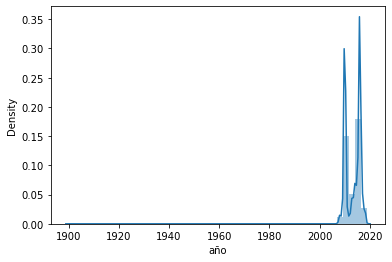

In [5]:
sns.distplot(dengue_raw.año)
plt.show()

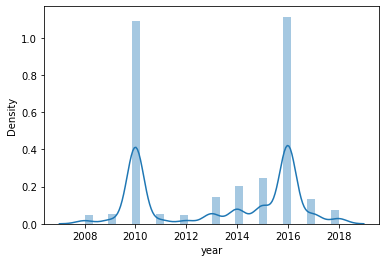

In [6]:
sns.distplot(dengue_raw.year)
plt.show()

¿ Cuál escoger entonces? Al menos los días y los meses encajan (aparentemente, pues puede haber meses que tienen más meses de los que debería). Creo conveniente continuar con `year`. Esa será la variable a concatenar con `mes` y `dia` para crear una nueva variable `date` de tipo date:

In [7]:
#Pasar el año a string
dengue_raw['y_string'] = (dengue_raw['year']).astype(str)

#Agregarlos en un objeto
dates=dengue_raw[['y_string', 'mes', 'dia']].agg('-'.join, axis=1)

#Pegarlos como fecha en `date`
dengue_raw['date']= pd.to_datetime(dates)

In [8]:
dengue_raw.head()

id  semana  edad uni_med sexo     nombre_barrio           comuna tipo_ss  \
0   1      24    49       1   M              Belen            Belen      C    
1   2      24    47       1   M              Belen            Belen      C    
2   3      24    46       1   M              Sucre    Villa Hermosa      C    
3   4      24    45       1   M    SIN INFORMACION  SIN INFORMACION      C    
4   5      24    46       1   M   Perpetuo Socorro    La Candelaria      C    

  cod_ase     fec_con  ... aum_hemato caida_plaq acum_liquievento  evento  \
0  EAS022  19/06/2010  ...         SD         SD               SD  DENGUE   
1  CCF002  18/06/2010  ...         SD         SD               SD  DENGUE   
2  EPS010  21/06/2010  ...         SD         SD               SD  DENGUE   
3  EPS010  15/06/2010  ...         SD         SD               SD  DENGUE   
4  EPS010  20/06/2010  ...         SD         SD               SD  DENGUE   

   year dia mes   año y_string       date  
0  2010  19  06  2010     2010 2010-06-19  
1  2010  18  06  2010     2010 2010-06-18  
2  2010  21  06  2010     2010 2010-06-21  
3  2010  15  06  2010     2010 2010-06-15  
4  2010  20  06  2010     2010 2010-06-20  

[5 rows x 43 columns]

Dado que en un futuro me interesaría ver el comportamiento del fenómeno en el espacio, desecharé aquellas observaciones que no tengan barrio o comuna.

In [9]:
#Primero pasaré `nombre_barrio` y `comuna` a mayúscula sostenida y remplazaré cualquier caracter especial por su homónimo:
caracteres_especiales = {'Á':'A','É':'E','Í':'I','Ó':'O','Ú':'U','Ñ':'N'}

for i,j in caracteres_especiales.items():
    dengue_raw['comuna'] = dengue_raw['comuna'].str.upper().str.replace(i,j)
    dengue_raw['nombre_barrio'] = dengue_raw['nombre_barrio'].str.upper().str.replace(i,j)

In [10]:
#Acá vemos todas las comunas reportados
for i in dengue_raw.comuna.sort_values().unique():
    print(i)

ALTAVISTA
ARANJUEZ
BELEN
BUENOS AIRES
CASTILLA
CORREGIMIENTO DE SAN CRISTOBAL
CORREGIMIENTO DE SANTA ELENA
DOCE DE OCTUBRE
EL POBLADO
GUAYABAL
LA AMERICA
LA CANDELARIA
LAURELES
MANRIQUE
POPULAR
ROBLEDO
SAN ANTONIO DE PRADO
SAN JAVIER
SAN SEBASTIAN DE PALMITAS
SANTA CRUZ
SIN INFORMACION
VILLA HERMOSA


In [11]:
##Acá vemos todos los barrios reportados
#for i in dengue_raw.nombre_barrio.sort_values().unique():
#    print(i)

In [12]:
dengue_raw.nombre_barrio.value_counts()

SIN INFORMACION                3208
SAN ANTONIO DE PRADO           1175
LAS GRANJAS                     637
VILLATINA                       630
SAN BERNARDO                    575
                               ... 
SUBURBANO POTRERA MISERENGA       1
VOLCANA GUAYABAL                  1
SUBURBANO PEDREGAL ALTO           1
SUBURBANO EL PLACER               1
PALMITAS SECTOR CENTRAL           1
Name: nombre_barrio, Length: 326, dtype: int64

In [13]:
dengue_raw.comuna.value_counts()

VILLA HERMOSA                     4765
BELEN                             4242
MANRIQUE                          4149
BUENOS AIRES                      3719
ARANJUEZ                          3659
SAN JAVIER                        3358
SIN INFORMACION                   3190
ROBLEDO                           2834
POPULAR                           2642
DOCE DE OCTUBRE                   2640
LA CANDELARIA                     2595
SANTA CRUZ                        2319
CASTILLA                          1938
LA AMERICA                        1883
LAURELES                          1791
GUAYABAL                          1577
EL POBLADO                        1573
SAN ANTONIO DE PRADO              1222
ALTAVISTA                          828
CORREGIMIENTO DE SAN CRISTOBAL     568
CORREGIMIENTO DE SANTA ELENA       193
SAN SEBASTIAN DE PALMITAS           23
Name: comuna, dtype: int64

Existen valores `SIN INFORMACION` en `nombre_barrio` y `comuna`. Serán eliminados:

In [14]:
dengue_raw2 = dengue_raw.loc[(dengue_raw['nombre_barrio'] != 'SIN INFORMACION') & (dengue_raw['comuna'] != 'SIN INFORMACION')]

In [15]:
print(f"Se eliminaron:{dengue_raw.shape[0]-dengue_raw2.shape[0]} observaciones")

Se eliminaron:3208 observaciones


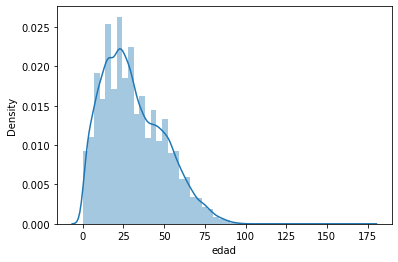

174      1
122      1
112      1
99       1
98       2
      ... 
4      625
3      620
2      518
1      531
0        5
Name: edad, Length: 103, dtype: int64

In [16]:
#Observaremos la edad y el sexo:
sns.distplot(dengue_raw2.edad)
plt.show()
dengue_raw.edad.value_counts().sort_index(ascending=False)

In [17]:
dengue_raw2.sexo.value_counts().sort_index(ascending=False)

M     23613
F     24887
Name: sexo, dtype: int64

Existen valores atípicos en la edad. Se desechará cualquier valor que supere 100 años. Y del sexo se eliminará la observación que tiene `SD`

In [18]:
dengue_raw3 = dengue_raw2.loc[dengue_raw['edad'] < 100]

In [19]:
dengue_raw3.shape

(48497, 43)

In [20]:
print(f"Se eliminaron:{dengue_raw2.shape[0]-dengue_raw3.shape[0]} observaciones")

Se eliminaron:3 observaciones


Con los atributos más importantes corregidos, voy a escoger las variables para el estudio. En este caso, no nos interesa niveles de intensidad del virus, o síntomas. Cada observación es un caso de dengue con una estampa temporal `date`. Escogeré entonces:

In [21]:
dengue_tidy = dengue_raw3.iloc[:,[42,5,6,2,4]]

In [22]:
dengue_tidy.head()

date           nombre_barrio         comuna  edad sexo
0 2010-06-19                   BELEN          BELEN    49   M 
1 2010-06-18                   BELEN          BELEN    47   M 
2 2010-06-21                   SUCRE  VILLA HERMOSA    46   M 
4 2010-06-20        PERPETUO SOCORRO  LA CANDELARIA    46   M 
5 2010-06-17  TERMINAL DE TRANSPORTE       CASTILLA    45   M

### SECCIÓN II - INTERPRETACIÓN DE LOS DATOS
___

In [23]:
#Realizaré un análisis a nivel de comuna para obtener algunas conclusiones del fenómeno.
#Debo definiar una variable que contabilice la cantidad de casos. Esto para poder sumar los casos por comuna o barrio. Cada observación es un caso
#por lo que se asigna una columna contaste =1, así:

dengue_tidy['casos'] = 1

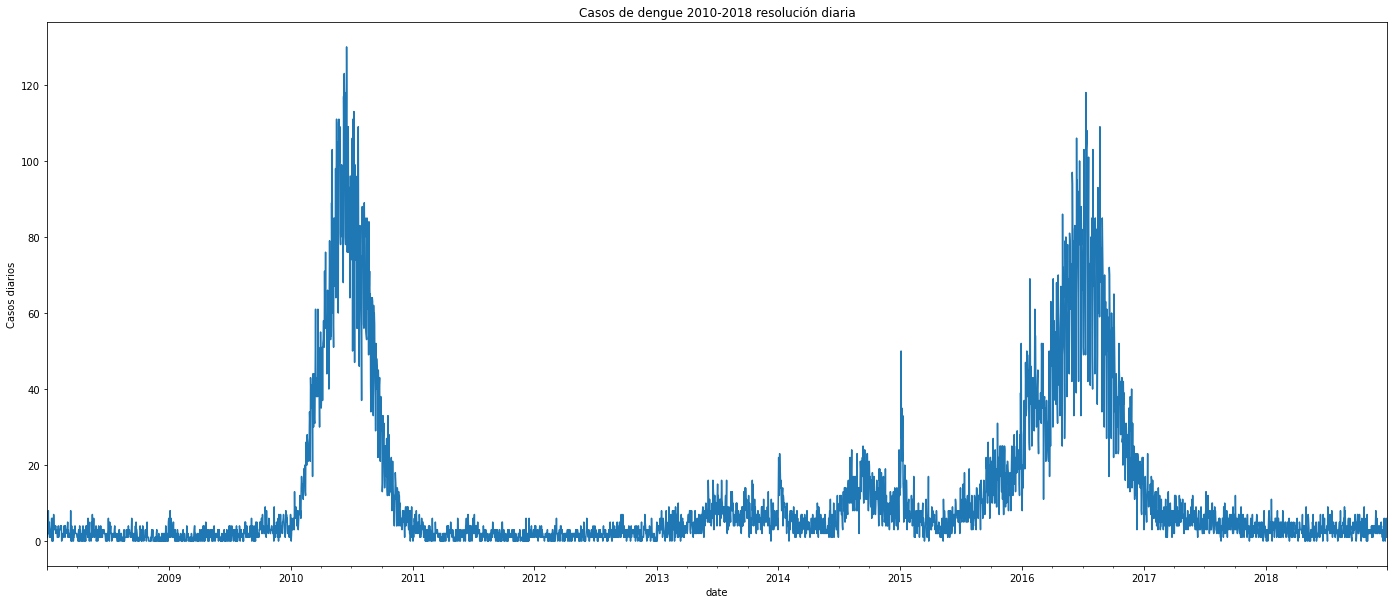

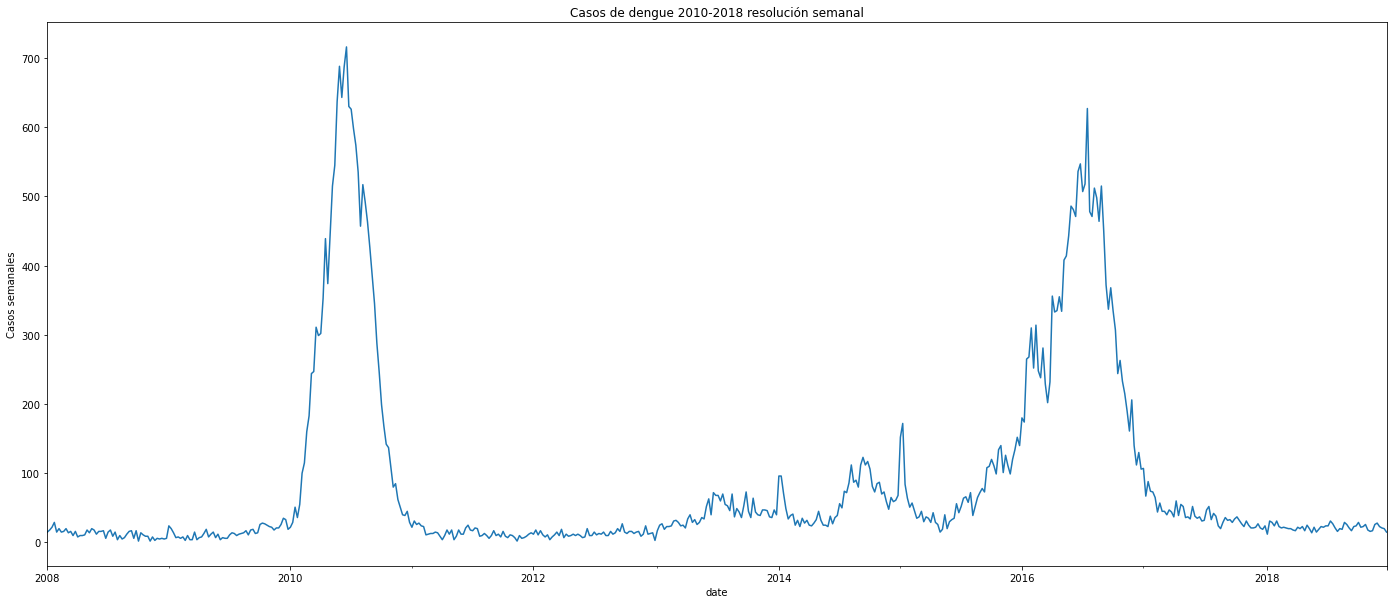

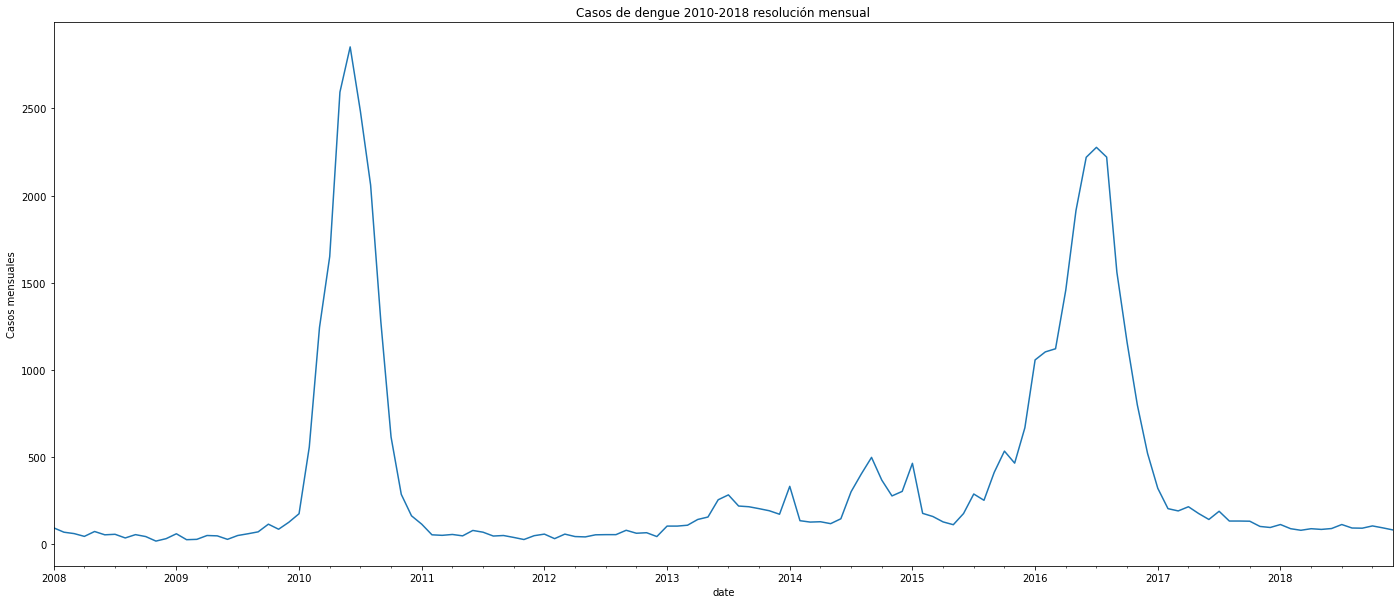

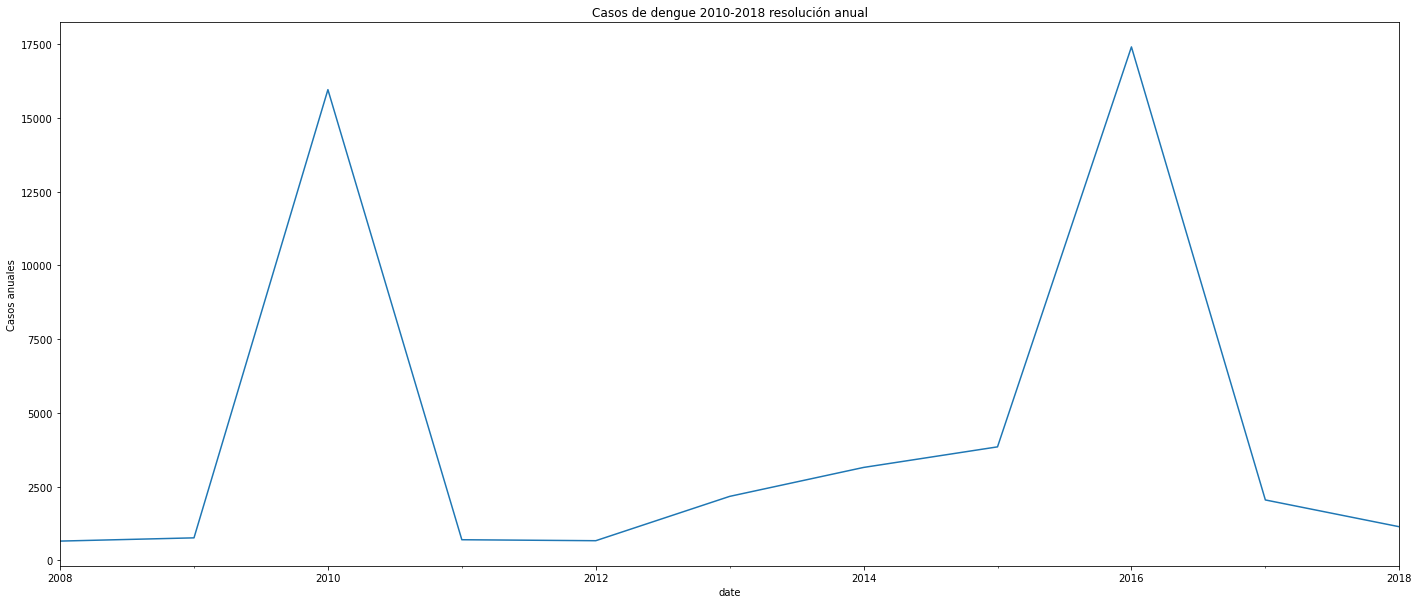

In [24]:
#Para tener una vista preliminar de cómo se comportaron los contagios entre 2010-2018
#Se hará una gráfica para cada uno a nivel:

#A nivel diario:
plt.figure(figsize=(24,10))
dengue_tidy.resample('D', on ='date').size().plot()
plt.ylabel('Casos diarios')
plt.title('Casos de dengue 2010-2018 resolución diaria')

#A nivel semanal:
plt.figure(figsize=(24,10))
dengue_tidy.resample('W', on ='date').size().plot()
plt.ylabel('Casos semanales')
plt.title('Casos de dengue 2010-2018 resolución semanal')

#A nivel mensual:
plt.figure(figsize=(24,10))
dengue_tidy.resample('M', on ='date').size().plot()
plt.ylabel('Casos mensuales')
plt.title('Casos de dengue 2010-2018 resolución mensual')

#A nivel anual:
plt.figure(figsize=(24,10))
dengue_tidy.resample('A', on ='date').size().plot()
plt.ylabel('Casos anuales')
plt.title('Casos de dengue 2010-2018 resolución anual')
plt.show()

Al interpretar las figuras se observa que en 2010 hubo un pico de algo más de 15.000 casos en toda la ciudad. Desde 2012 hasta finales de 2015 se observa un incremento constante en los casos cada año, para en 2016 presentar un pico mucho más alto con casi 17.500 casos. En las secciones de más adelante analizaré con mayor detalle algún tipo de autocorrelación, e intentar predecir a futuro con base en el pasado.

In [25]:
#Al realizar este resample puedo encontrar la cantidad de casos por año:

print(dengue_tidy.resample('AS', on ='date').casos.sum().reset_index())
print("\nLos años con mayores contagios fueron 2010 y 2016, acá hay algún patrón estacional que debe ser investigado más adelante")

         date  casos
0  2008-01-01    650
1  2009-01-01    760
2  2010-01-01  15966
3  2011-01-01    696
4  2012-01-01    663
5  2013-01-01   2167
6  2014-01-01   3149
7  2015-01-01   3847
8  2016-01-01  17416
9  2017-01-01   2046
10 2018-01-01   1137

Los años con mayores contagios fueron 2010 y 2016, acá hay algún patrón estacional que debe ser investigado más adelante


#### A continuación crearé un dataset donde agruparé los casos por comuna por mes:

In [26]:
#Creamos el resampleo mensual de dengue por barrio:
dengue_comuna = dengue_tidy.groupby('comuna').resample('MS', on ='date').sum().reset_index()
dengue_comuna = dengue_comuna.set_index('date')
dengue_comuna = dengue_comuna.drop(['edad'],axis=1)
#Volver a poner el índice de date:
dengue_comuna.head()

comuna  casos
date                        
2008-05-01  ALTAVISTA      1
2008-06-01  ALTAVISTA      0
2008-07-01  ALTAVISTA      0
2008-08-01  ALTAVISTA      0
2008-09-01  ALTAVISTA      0

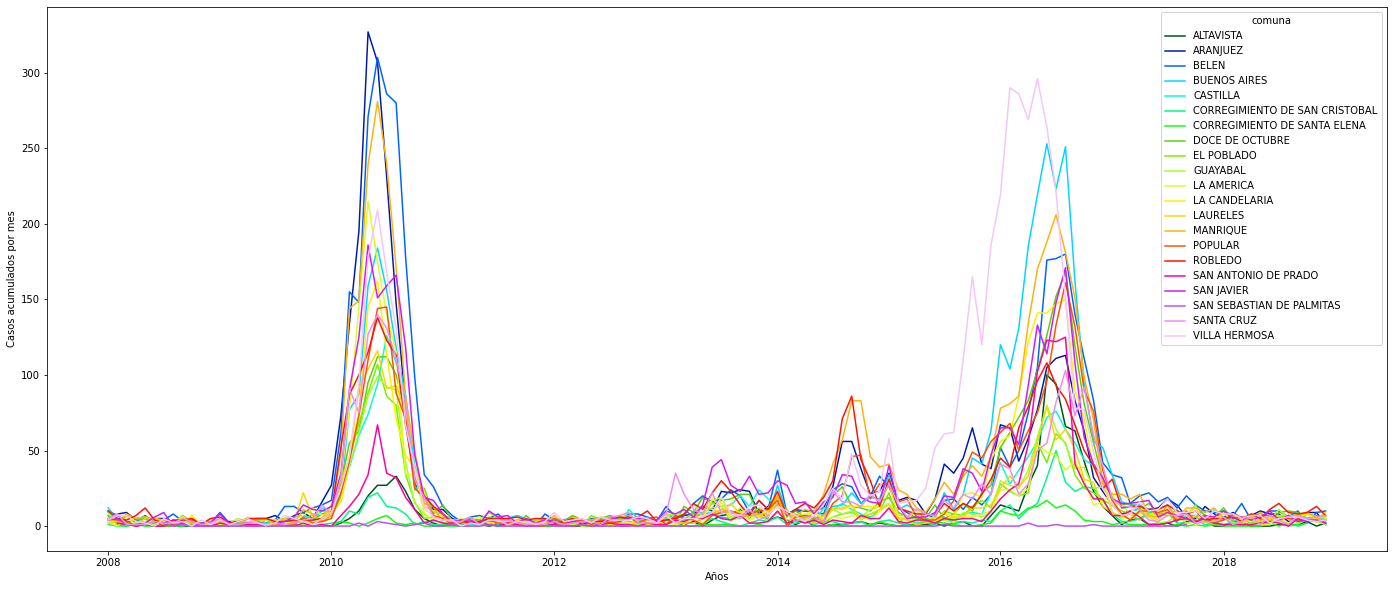

In [27]:
#En este gráfico podemos ver el comportamiento del fenómono por cada comuna
plt.figure(figsize=(24,10))
sns.lineplot(data=dengue_comuna, x='date',y='casos', hue='comuna',palette='gist_ncar')
plt.ylabel('Casos acumulados por mes')
plt.xlabel('Años')
plt.show()

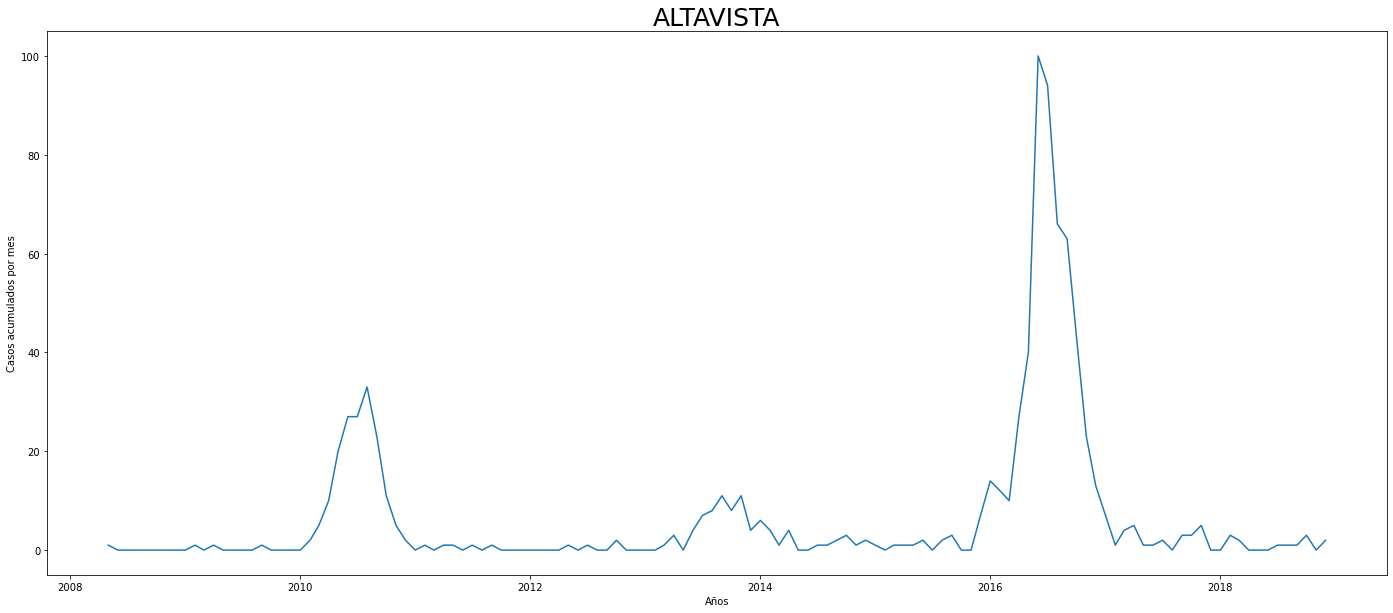

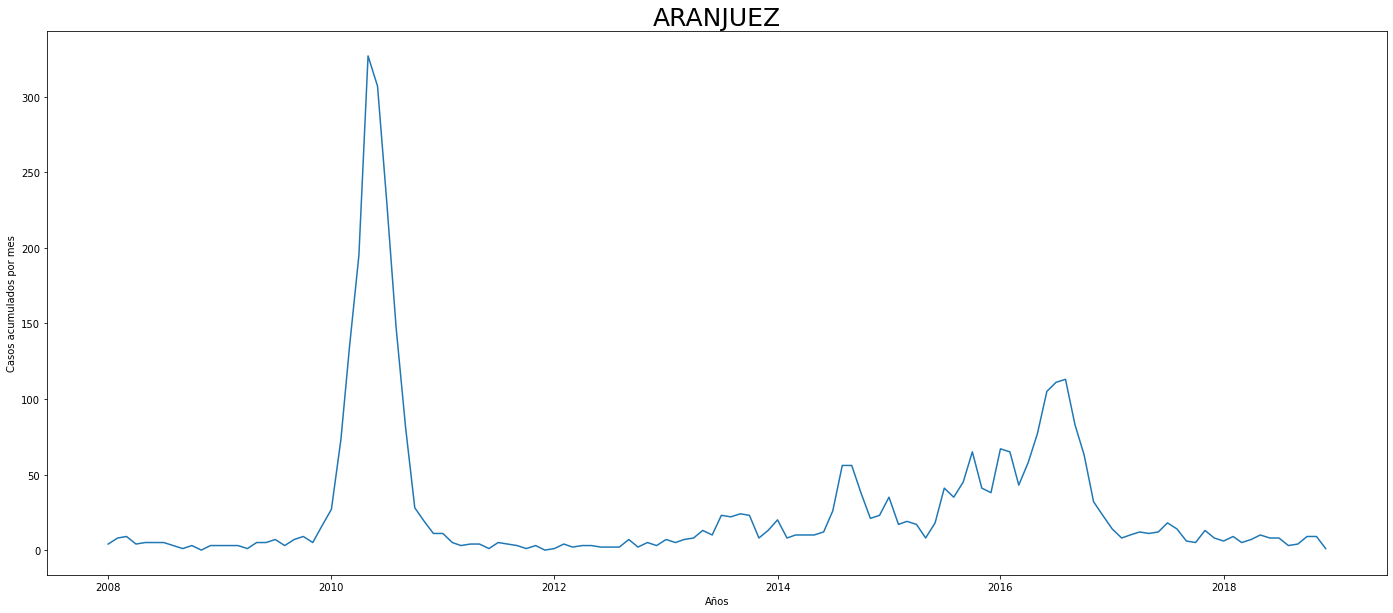

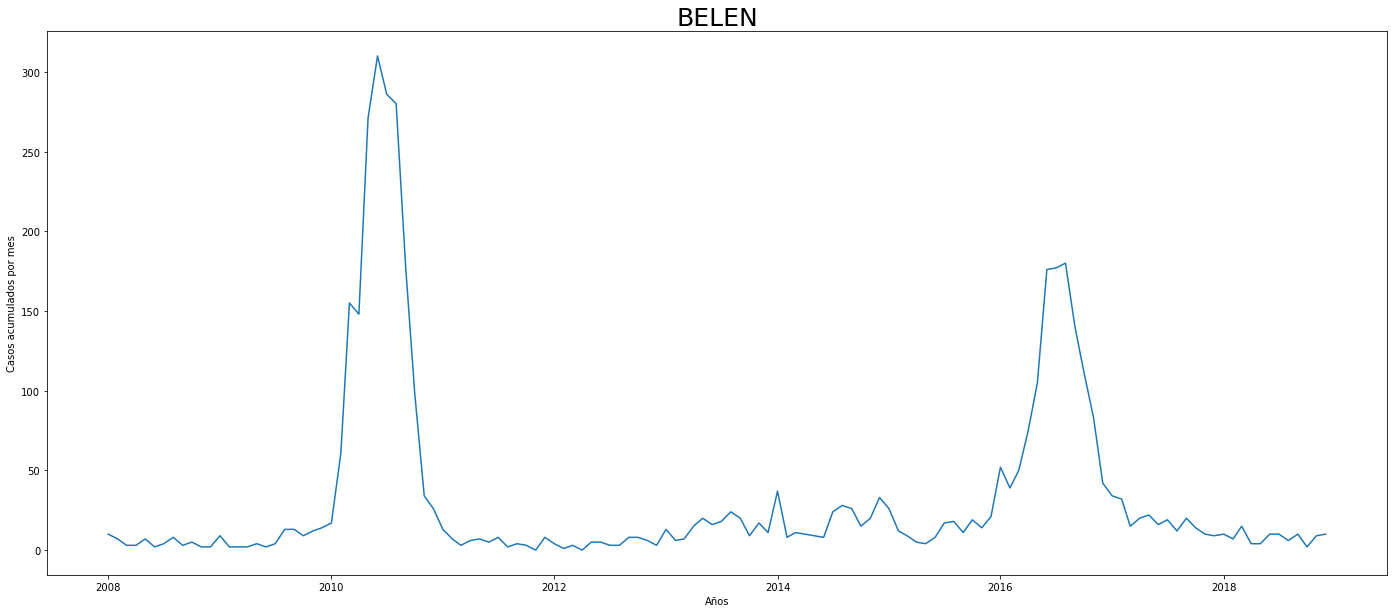

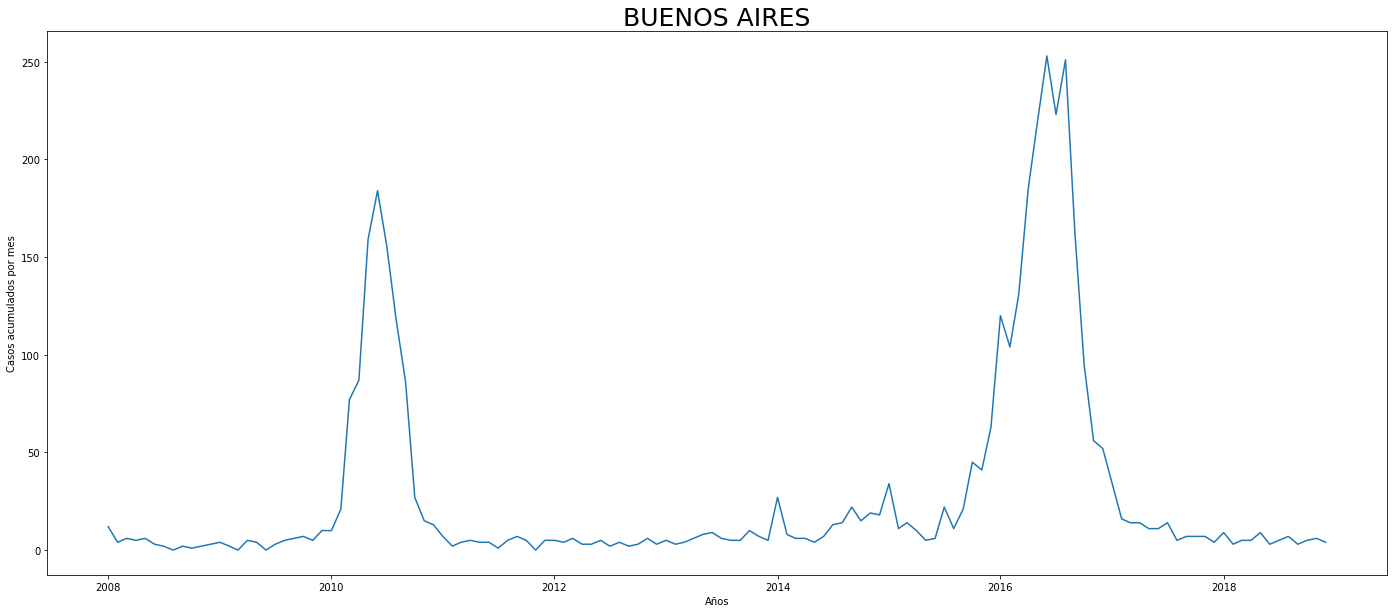

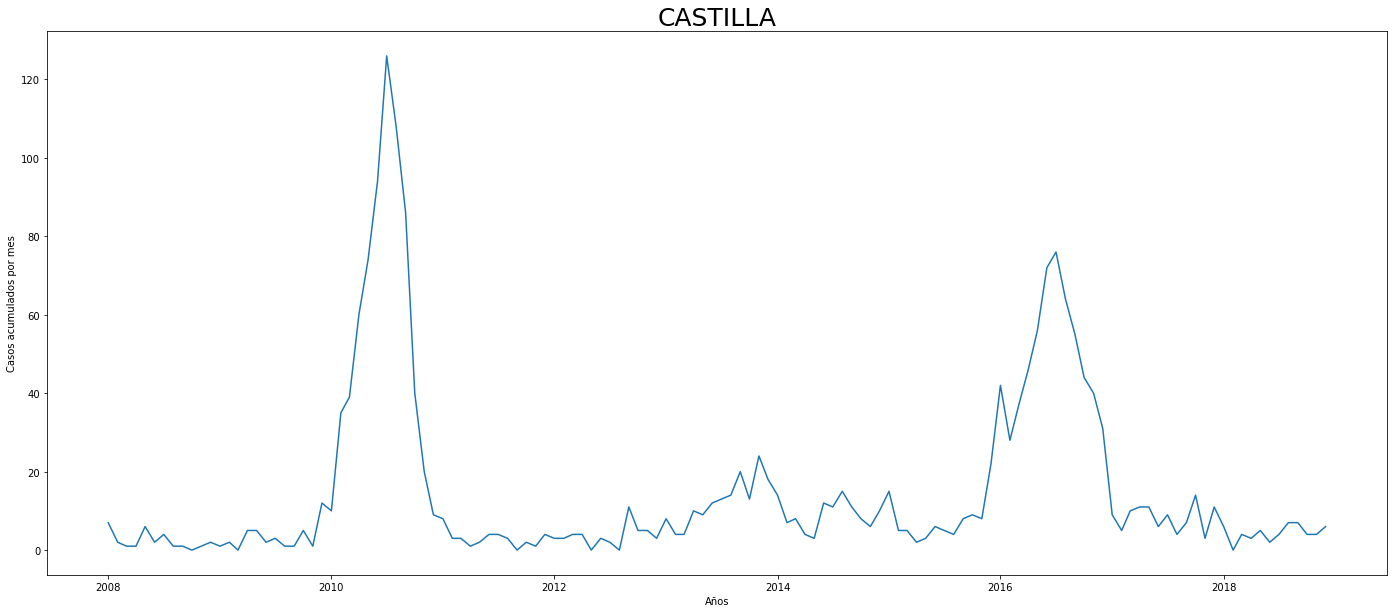

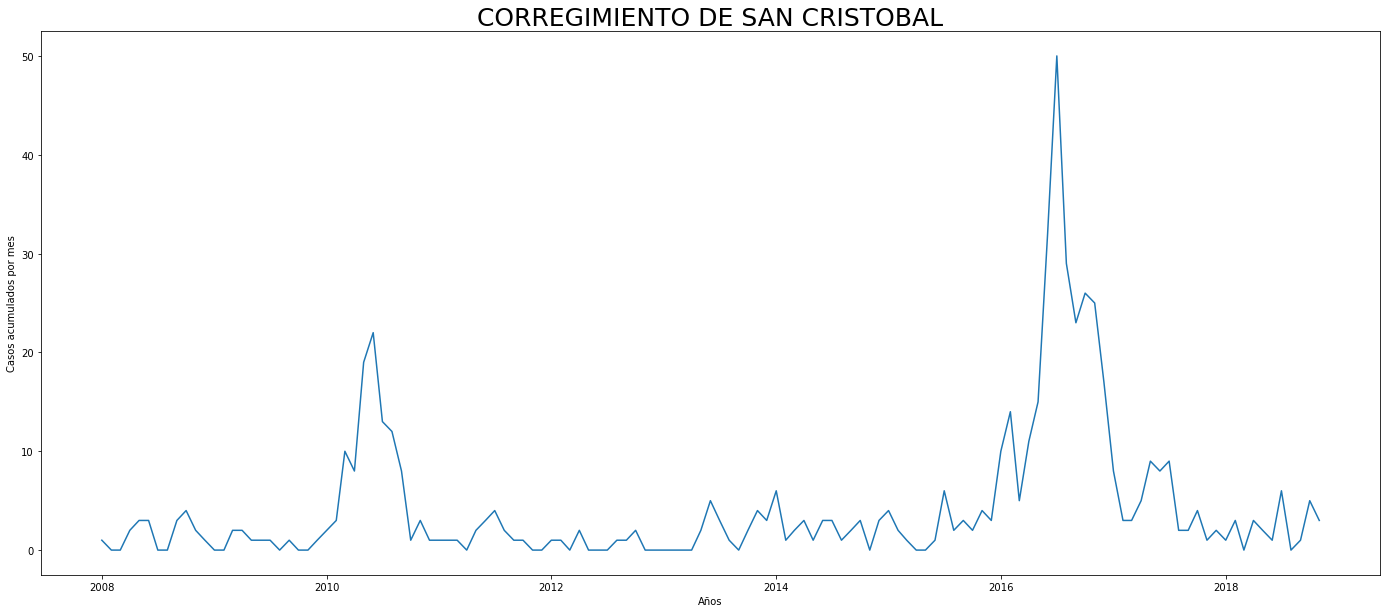

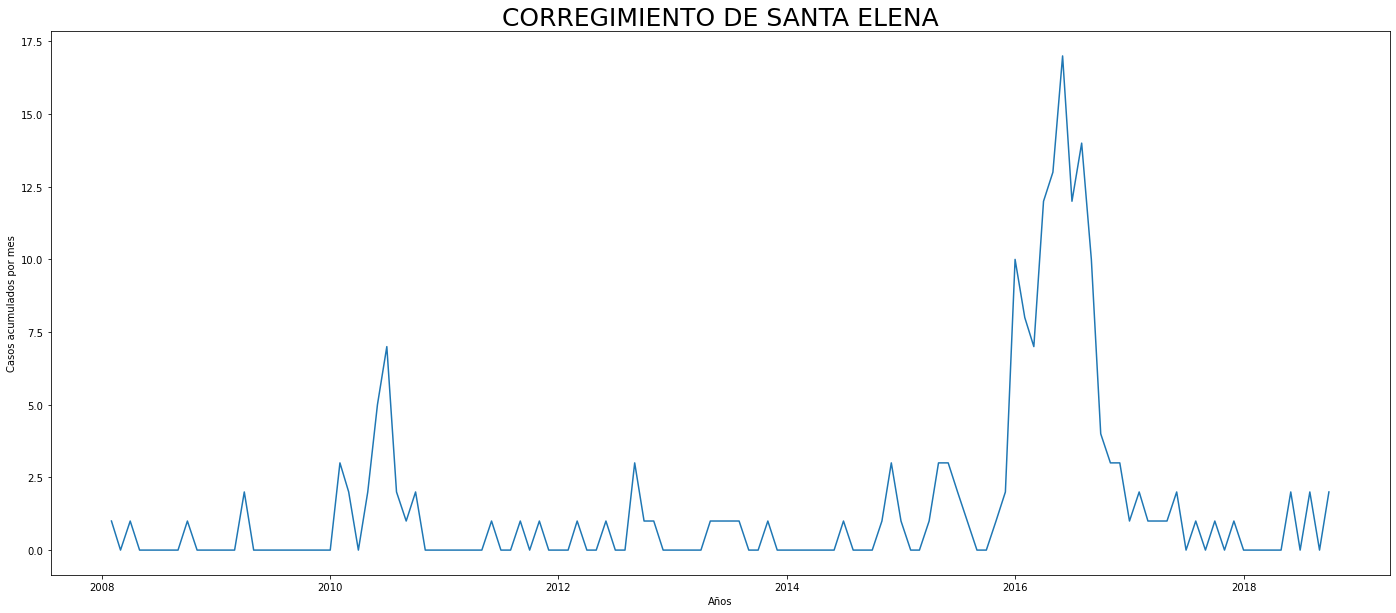

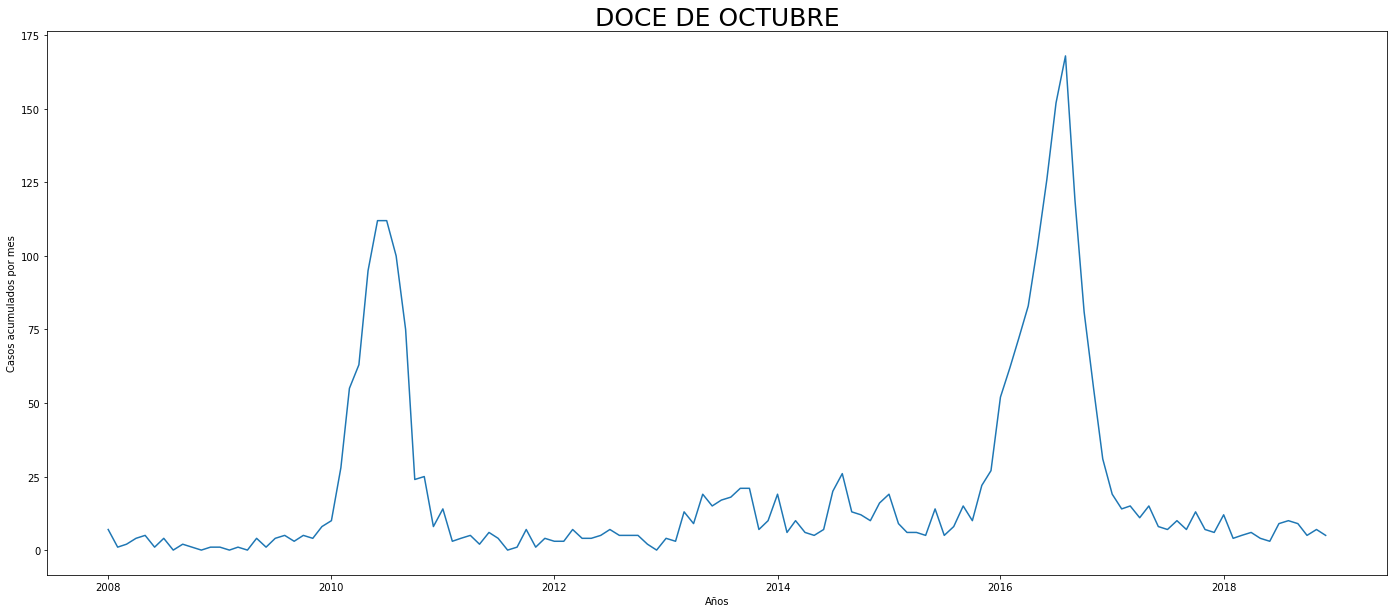

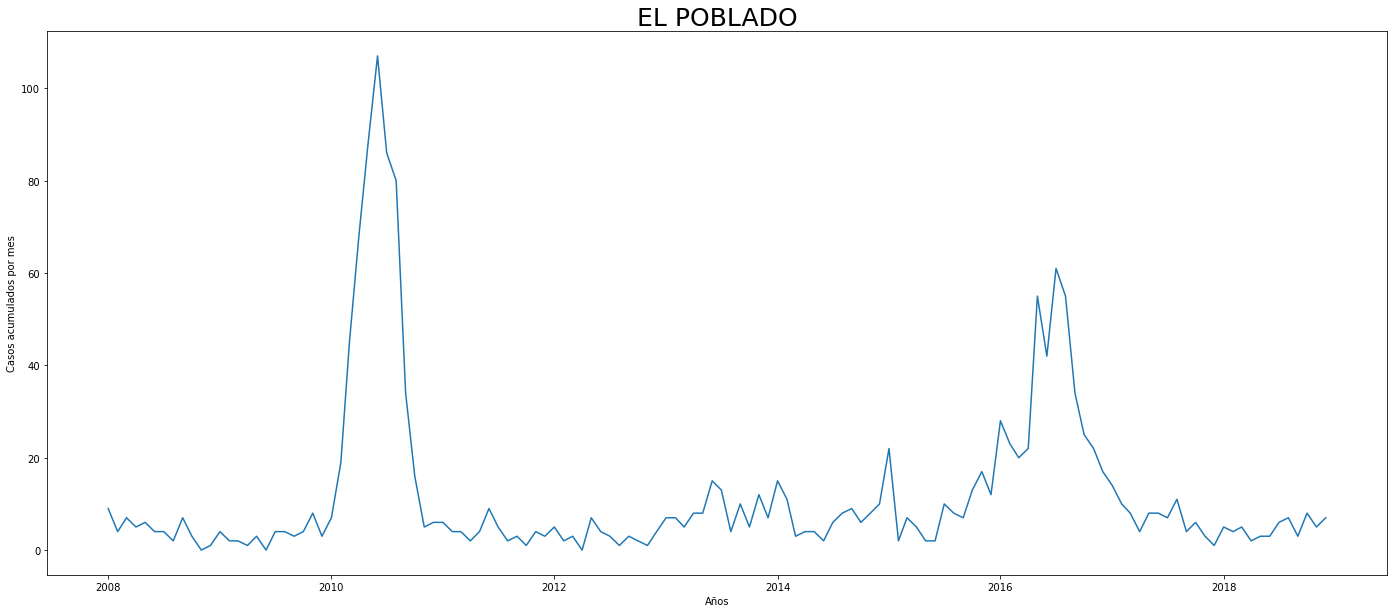

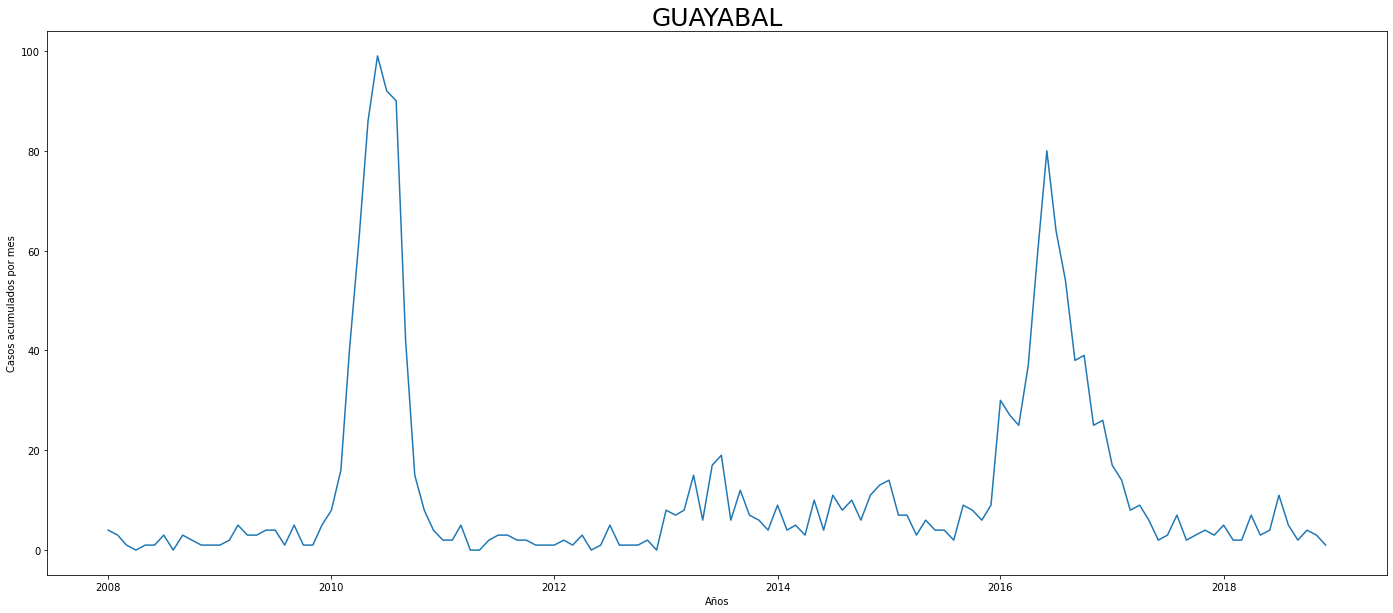

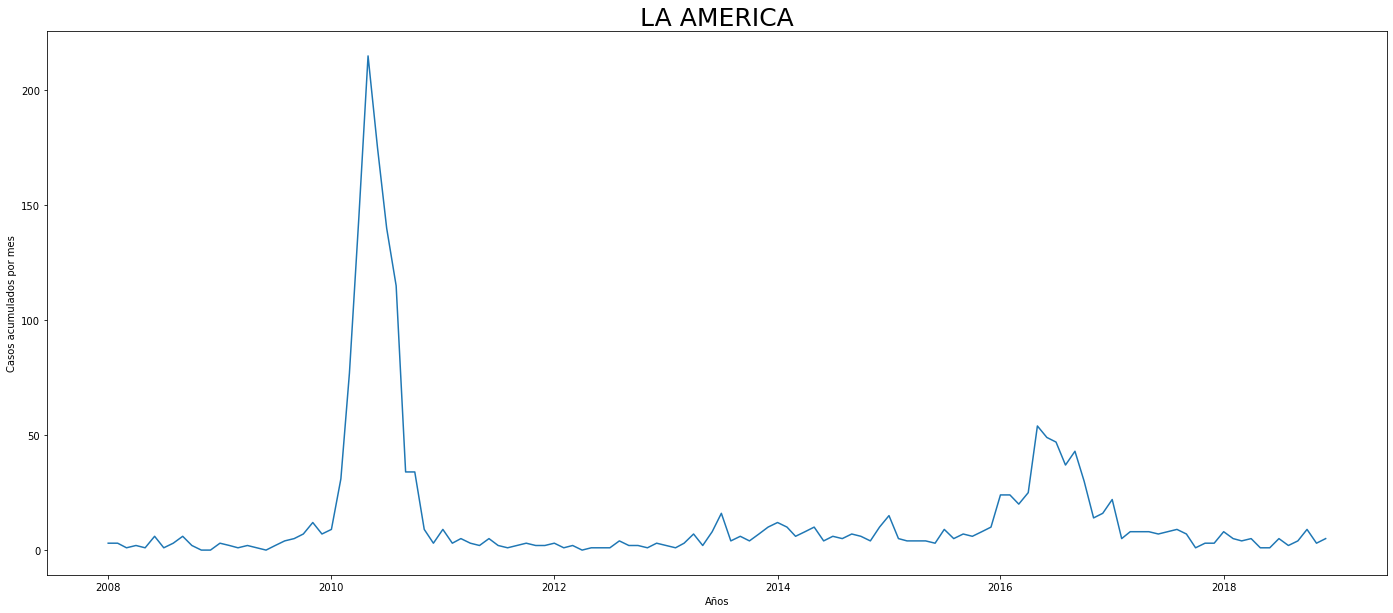

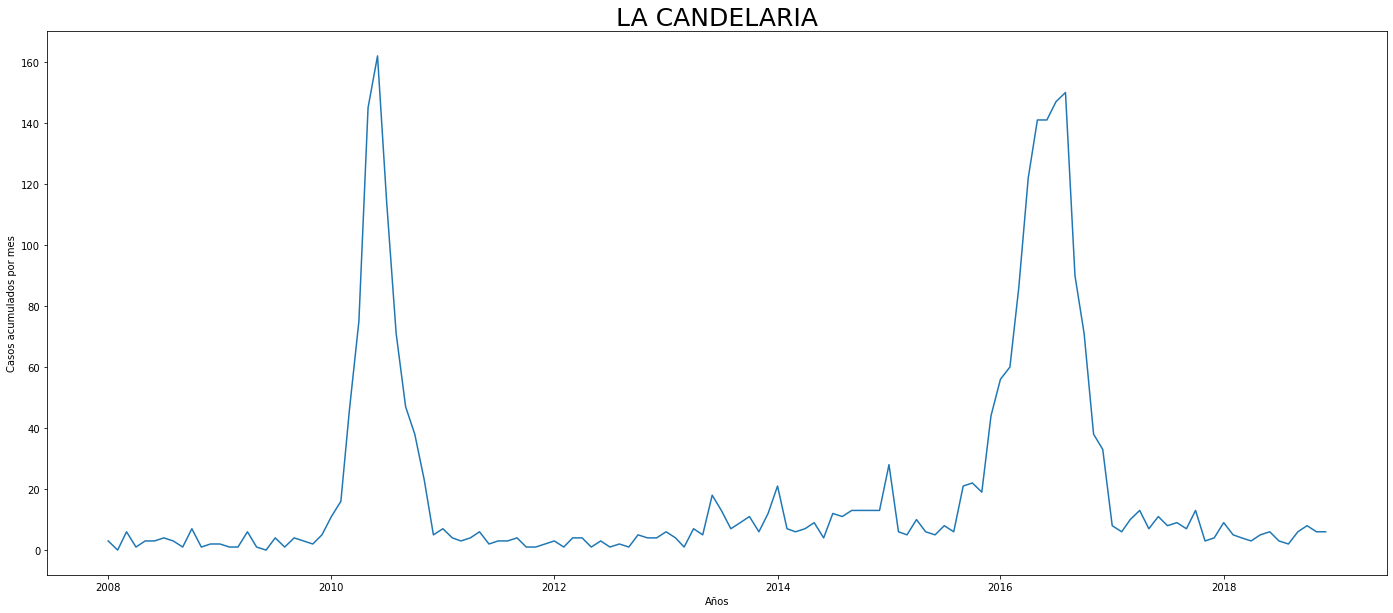

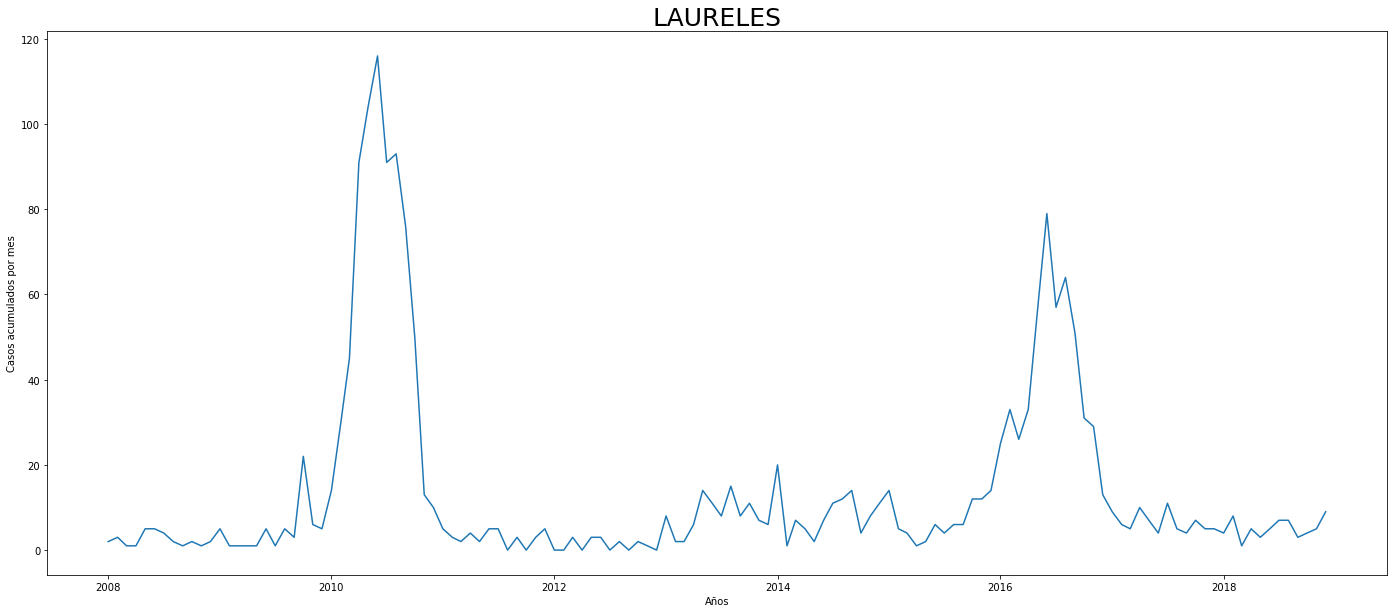

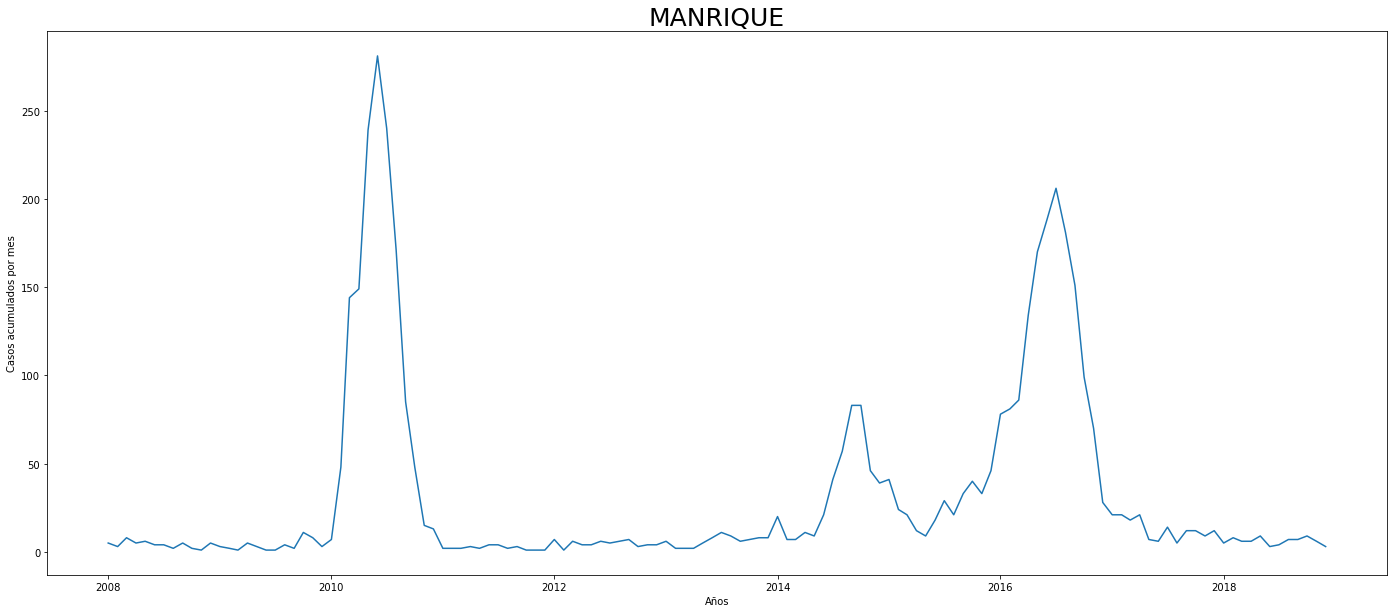

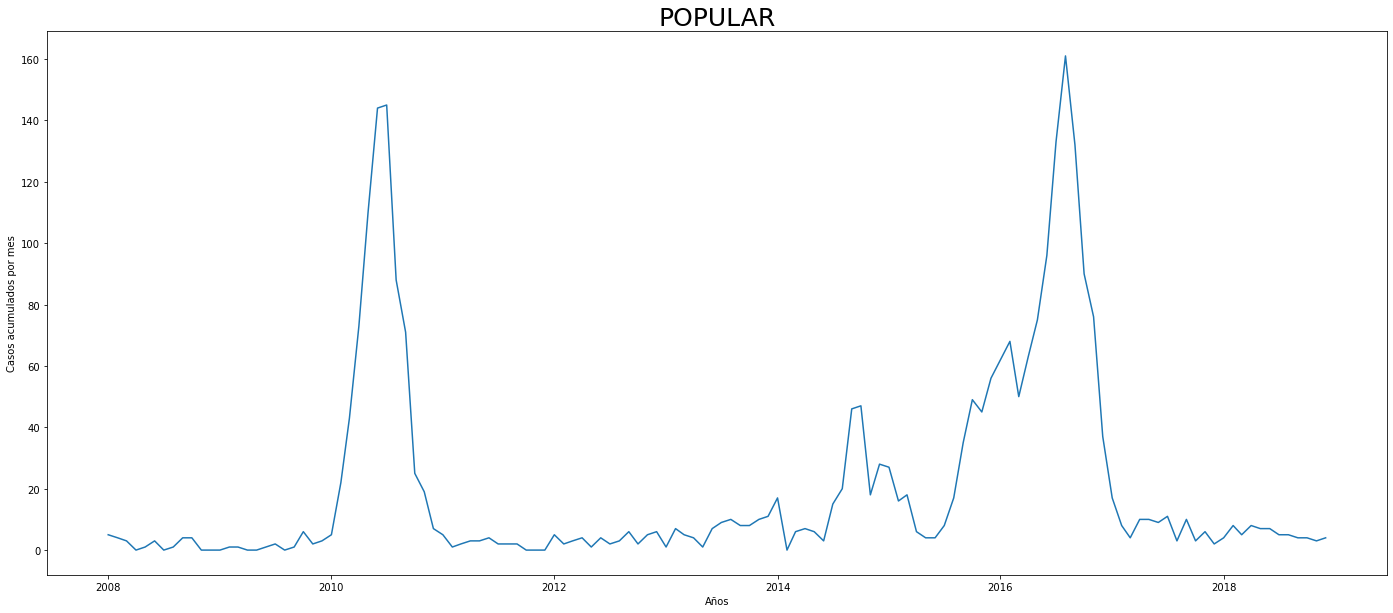

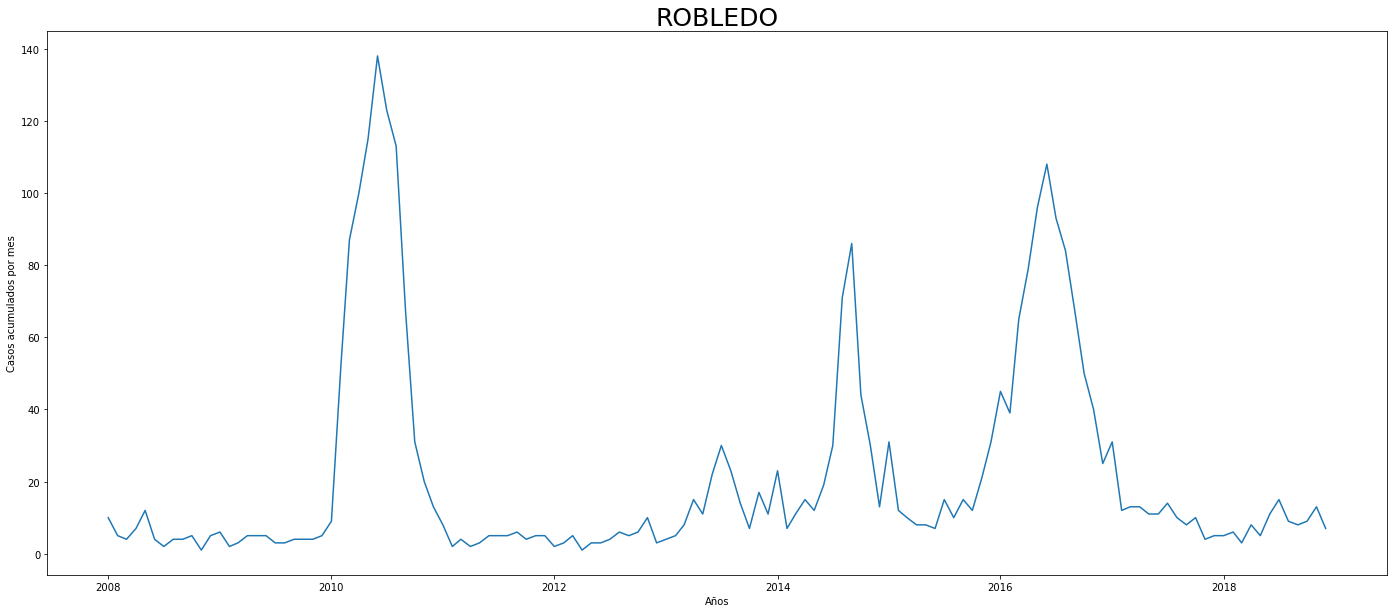

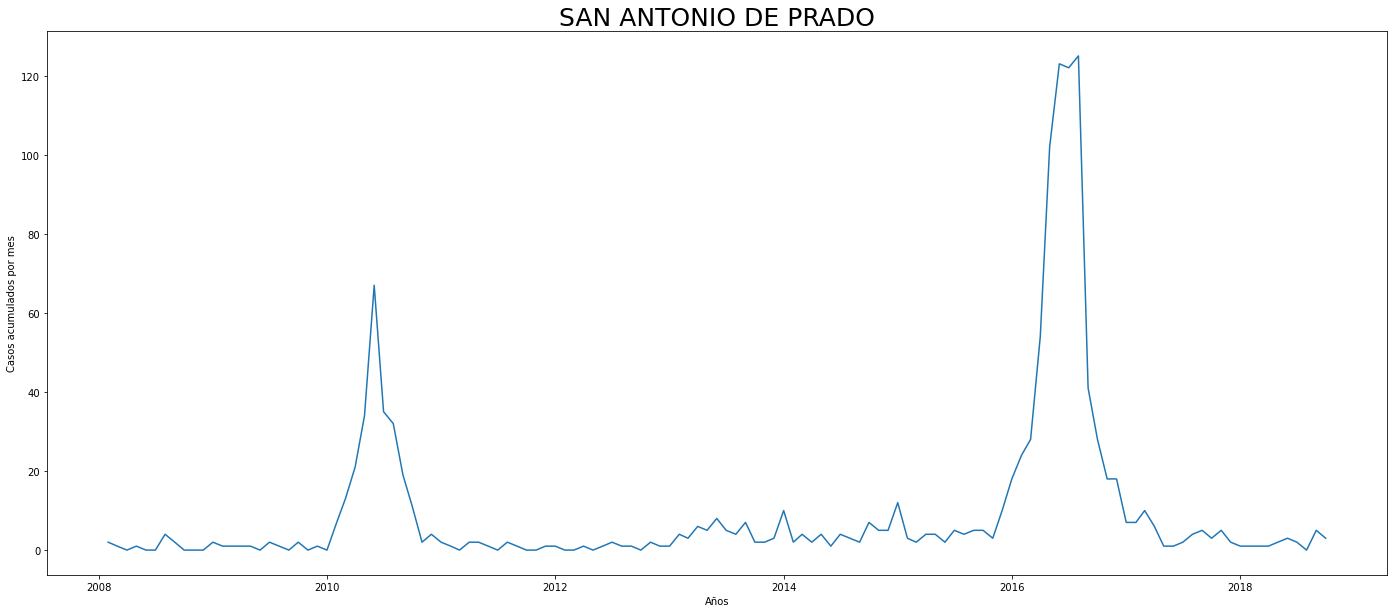

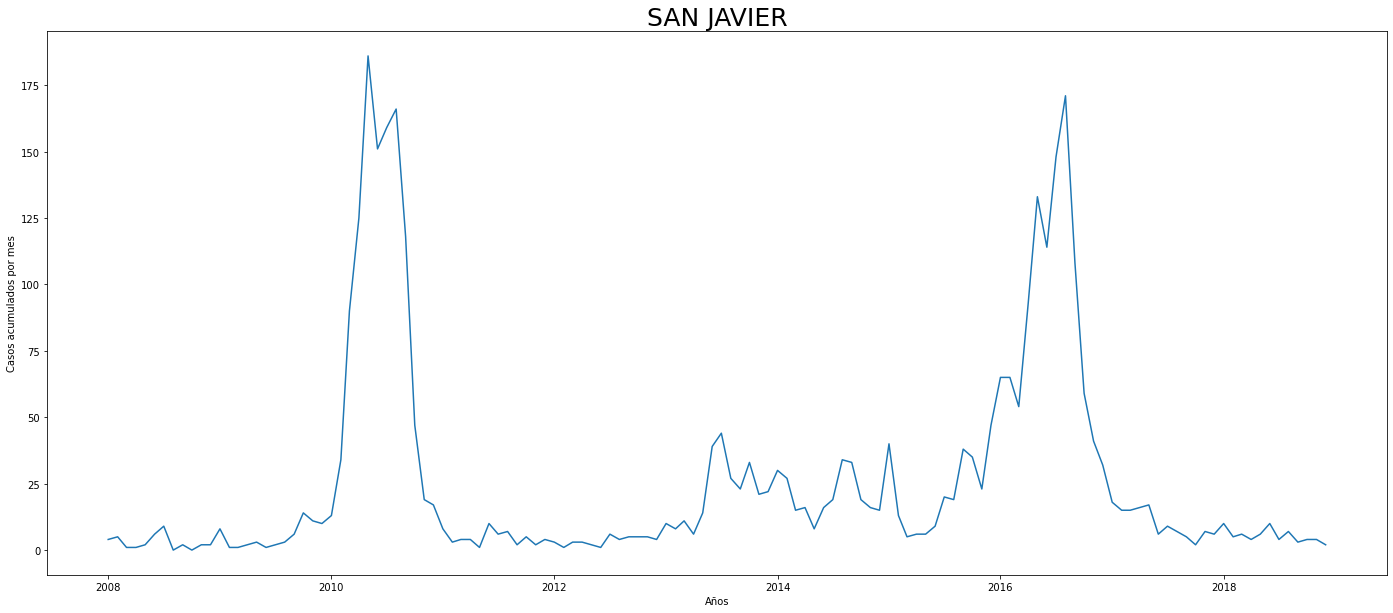

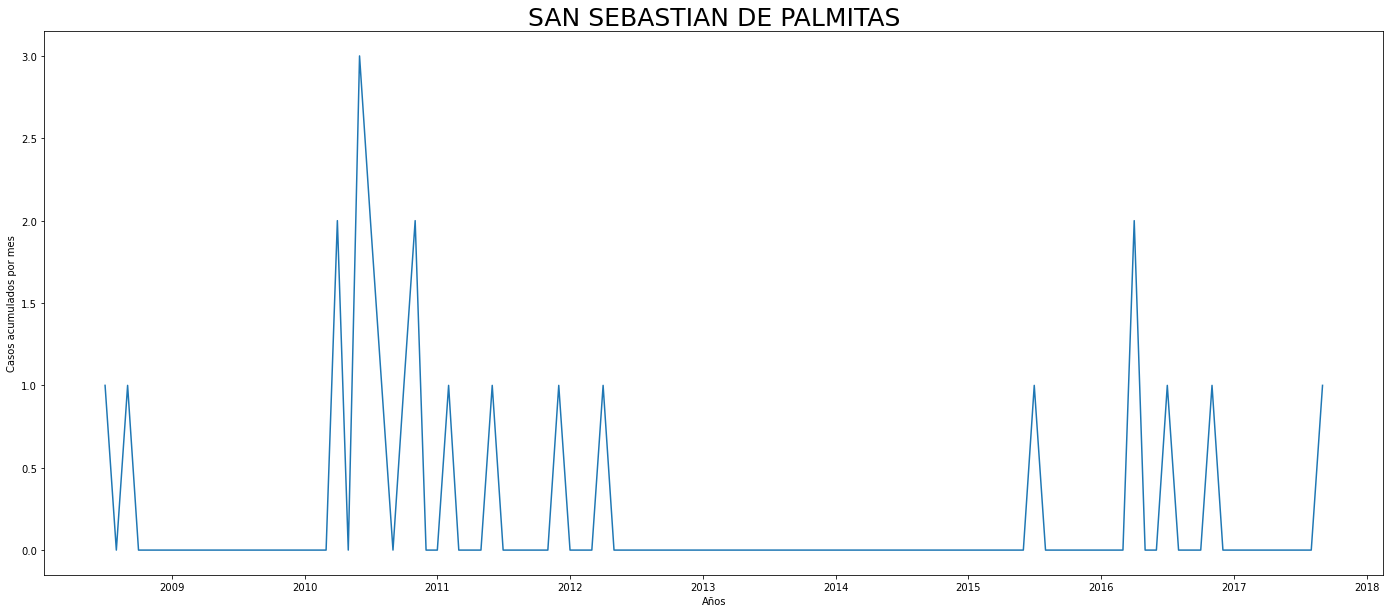

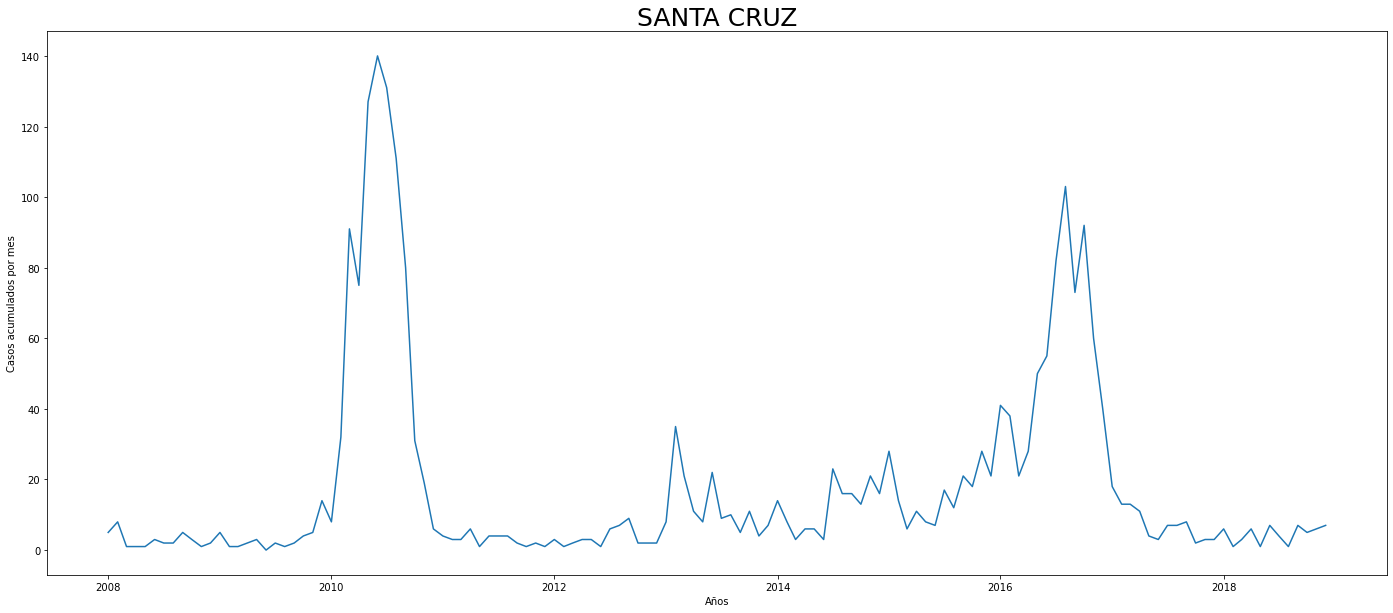

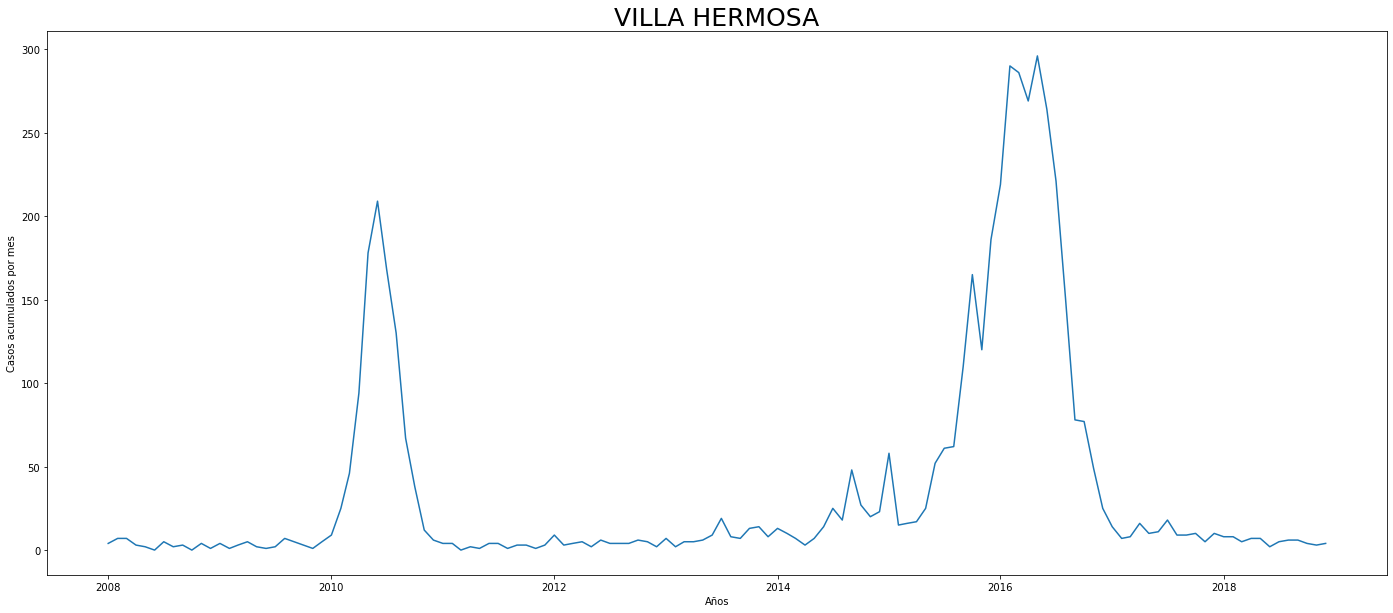

In [28]:
#Con el fin de obtener una mejor interpretación de cada comuna se graficará por cada comuna el comportamiento mensual de los contagios:
for comu in dengue_comuna.comuna.unique():
    plt.figure(figsize=(24,10))
    sns.lineplot(data=dengue_comuna.loc[dengue_comuna.comuna==comu], x='date',y='casos')
    plt.ylabel('Casos acumulados por mes')
    plt.xlabel('Años')
    plt.title(comu,fontsize=25)    
plt.show()

De los gráficos individuales se puede observar que:

En Altavista el pico de 2010 no es tán pronunciado, igual en San Cristobal, Santa Elena y San Antonio de Prado. Estos son corregimientos de Medellín, algo así como una ruralidad urbana. El Corregimiento de Palmitas presenta datos anómalos, por lo que se tendrá en cuenta más adelante para ser descartado.

Para el 2016 las comunas con menos casos mensuales que las demás fueron Palmitas, Santa Elena, San Cristobal, La America, El Poblado, Laureles, Guayabal y Altavista

Esto puede ser comprobado de la siguiente manera:

In [29]:
dengue_1016 = dengue_comuna.loc[dengue_comuna.index.year.isin([2010,2016])]

dengue_1016_resumen = dengue_1016.groupby(['comuna',dengue_1016.index.year]).sum().reset_index()

print('Sumatoria de casos por comuna para 2010')
print(dengue_1016_resumen.loc[dengue_1016_resumen.date==2010].sort_values('casos'))
print('\n')
print('Sumatoria de casos por comuna para 2016')
print(dengue_1016_resumen.loc[dengue_1016_resumen.date==2016].sort_values('casos'))

Sumatoria de casos por comuna para 2010
                            comuna  date  casos
36       SAN SEBASTIAN DE PALMITAS  2010     11
12    CORREGIMIENTO DE SANTA ELENA  2010     24
10  CORREGIMIENTO DE SAN CRISTOBAL  2010    102
0                        ALTAVISTA  2010    165
32            SAN ANTONIO DE PRADO  2010    245
16                      EL POBLADO  2010    561
18                        GUAYABAL  2010    562
8                         CASTILLA  2010    701
14                 DOCE DE OCTUBRE  2010    707
24                        LAURELES  2010    733
28                         POPULAR  2010    752
22                   LA CANDELARIA  2010    753
38                      SANTA CRUZ  2010    851
30                         ROBLEDO  2010    868
6                     BUENOS AIRES  2010    953
40                   VILLA HERMOSA  2010    982
20                      LA AMERICA  2010    987
34                      SAN JAVIER  2010   1125
26                        MANRIQUE  2010   1440


### SECCIÓN II - EXPLORACIÓN COMO SERIE DE TIEMPO
___

#### SECCIÓN II.I - AJUSTE TEMPORAL
___

In [30]:
#Para continuar de la manera más sencilla agruparé a nivel mensual desde 2008 hasta 2018 la cantidad de casos.
#Dejando únicamente el índice como un objeto 'datetime' y la cantidad de casos:

dengue_mensual = dengue_tidy.resample('MS', on = 'date').sum().drop('edad',axis=1)
print(dengue_mensual)

dengue_mensual.shape[0]/12

#Las 132 observaciones corresponden los doce meses de los 11 años que abarcan los datos

            casos
date             
2008-01-01     95
2008-02-01     70
2008-03-01     62
2008-04-01     46
2008-05-01     74
...           ...
2018-08-01     94
2018-09-01     93
2018-10-01    106
2018-11-01     95
2018-12-01     83

[132 rows x 1 columns]


11.0

<AxesSubplot:xlabel='date'>

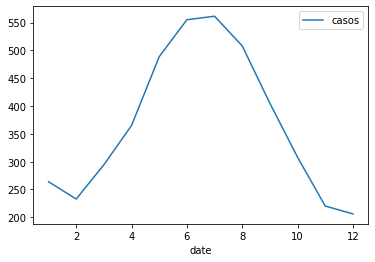

In [31]:
#Con las siguientes líneas de código podemos ver el comportamiento medio durante los 12 meses de todos los años
indice_mensual = dengue_mensual.index.month
dengue_pormes = dengue_mensual.groupby(indice_mensual).mean()
dengue_pormes.plot()

Este es el comportamiento promedio mensual. Se observa que desde abril hasta junio o julio hay aumento en los casos, luego un descenso de los contagiados. Es de recordar que esto son los casos promedios por mes por año. El comportamiento para cada año puede ser diferente, pero en promedio esta es la tendencia. Esto se puede corroborar a continuación verificando estacionalidad:

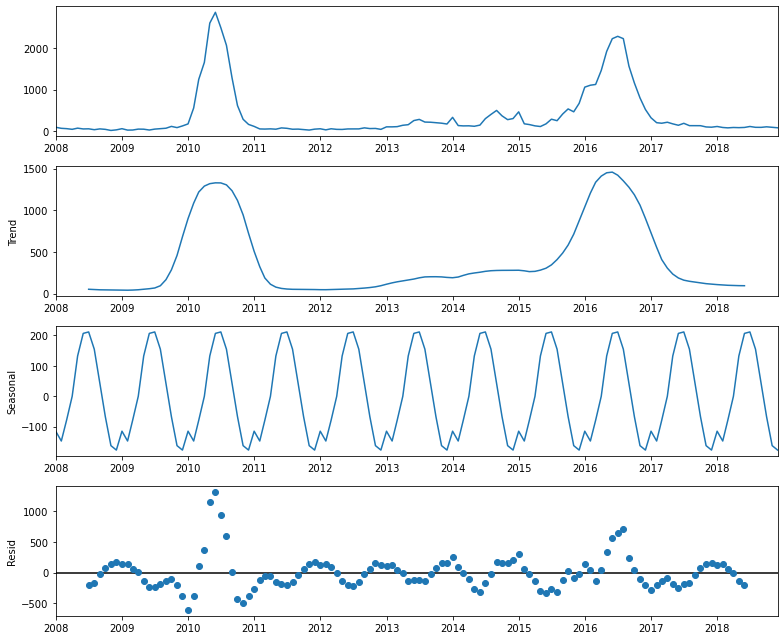

In [32]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 11,9
#Lo descompondremos a nivel mensual:
decomposition = sm.tsa.seasonal_decompose(dengue_mensual ,model='additive')
fig= decomposition.plot()
plt.show()

Al Observar las diferentes gráficas que proporciona el operador `seasonal_decompose` se reafirma la tandencia a aumentar a mediados de 2010 y 2016. Este comportamiento "outlier" sesgará fuertemente el modelo de predicción más adelante. 

#### SECCIÓN II.II - AUTOCORRELACIÓN
___

Voy a analizar la autocorrelación de la serie con una cantidad de lags igual a la cantidad de observaciones (meses).

In [33]:
from statsmodels.tsa.stattools import acf
nlags =  dengue_mensual.shape[0] -1
autocorr = acf(dengue_mensual.casos, nlags = nlags)

Text(0.5, 0, 'Cantidad de lags (meses)')

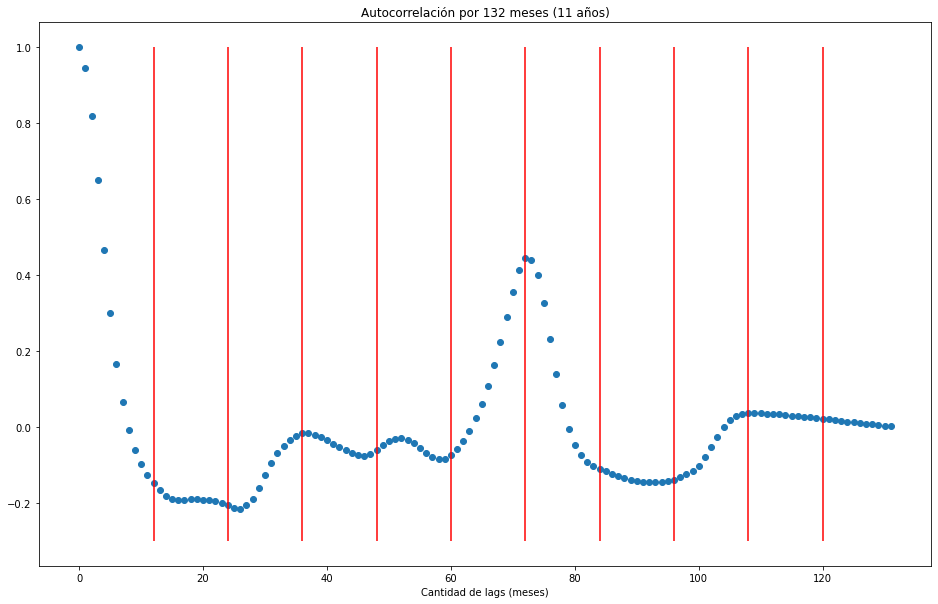

In [34]:
plt.figure(figsize = (16,10))
plt.scatter(x=np.arange(nlags+1), y= autocorr)
plt.title('Autocorrelación por 132 meses (11 años)')
plt.vlines(x=[range(12,132,12)],ymin=-0.3,ymax=1,colors='red')
plt.xlabel('Cantidad de lags (meses)')

In [35]:
print(f"Por autocorrelación se observa que luego de  casi 6 años (72 meses), hay una correlación que aumenta a un poco más de {autocorr[71]:.2f}")

Por autocorrelación se observa que luego de  casi 6 años (72 meses), hay una correlación que aumenta a un poco más de 0.41


<Figure size 1800x360 with 0 Axes>

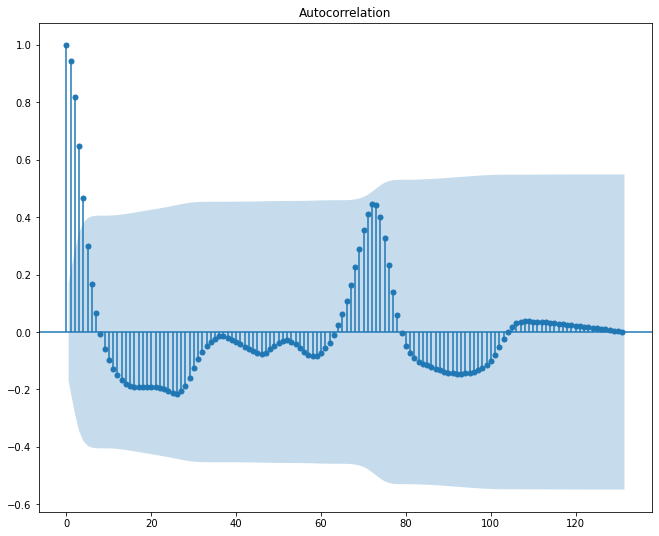

In [36]:
plt.figure(figsize = (25,5))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dengue_mensual.casos, lags = nlags)
plt.show()

Hay mucha incertidumbre en la aucorrelación. No obastante continuaremos el ejercicio entrenando un modelo de random forest. Dejaré como entrenamiento los primeros 7 años (84 meses). Dejando los 4 años siguientes como set de testeo. 

___
## PARTE B - MODELOS DE MACHINE LEARNING
___

Apoyado en el Notebook 41 de Acámica!

En primer lugar, debemos definir cuántos valores *hacia atrás* tomaremos.

In [37]:
look_back = 6 # usamos 6 meses para predecir el siguiente valor

Creamos los `X` e `y` con ceros para luego llenar con los datos. Notar los `shape`

In [38]:
N = dengue_mensual.shape[0]
N 

132

In [39]:
N = dengue_mensual.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(125, 6) (125,)


Llenamos los `X` e `y`

In [40]:
for i in range(X.shape[0]):
    X[i,:] = np.resize(dengue_mensual[i:i+look_back],look_back)
    y[i] = dengue_mensual.iloc[i+look_back]

In [41]:
#print(X)

In [42]:
print(y)

[  58.   37.   56.   45.   19.   33.   61.   27.   29.   51.   49.   29.
   51.   61.   72.  116.   87.  127.  176.  558. 1244. 1651. 2594. 2853.
 2484. 2061. 1278.  616.  287.  164.  116.   55.   52.   57.   49.   80.
   70.   48.   51.   40.   28.   50.   59.   33.   59.   45.   43.   55.
   56.   56.   81.   64.   67.   45.  105.  105.  110.  143.  157.  256.
  284.  220.  216.  205.  193.  173.  333.  136.  128.  130.  119.  147.
  302.  404.  499.  369.  278.  304.  465.  178.  160.  129.  113.  177.
  289.  253.  413.  535.  466.  669. 1058. 1104. 1122. 1458. 1915. 2220.
 2277. 2221. 1561. 1158.  800.  522.  322.  205.  192.  216.  177.  143.
  190.  134.  134.  133.  103.   97.  114.   90.   81.   90.   86.   91.
  114.   94.   93.  106.   95.]


Hacemos el train/test split. Esta parte puede ser confusa, por lo que esta parte es retomada del notebook de Acámica, cambiando algunos parámetros que se ajusten a la medida mensual de mis datos

In [43]:
N_train =  72 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 48 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(66, 6) (66,)
(48, 6) (48,)


Entrenamos el modelo propuesto

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1111, n_jobs = -1).fit(X_train,y_train)

In [45]:
#Predecimos:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

Y graficamos:

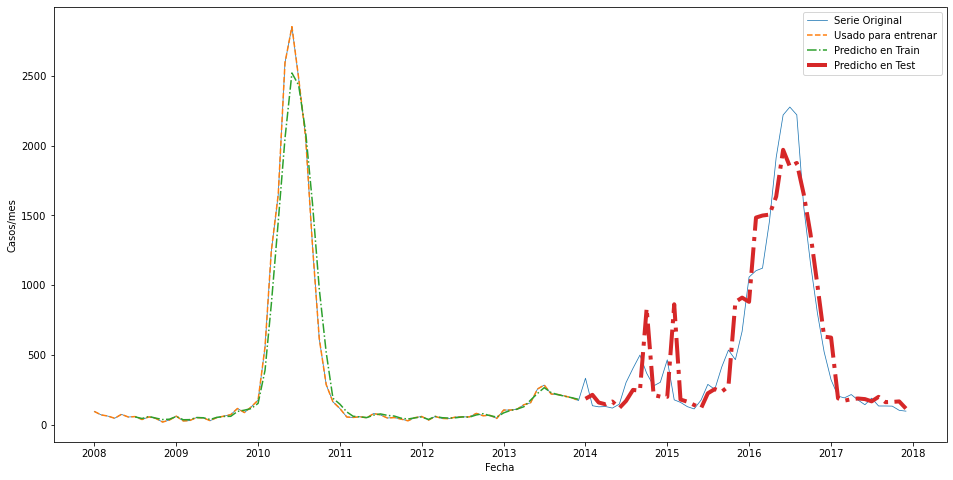

In [46]:
plt.figure(figsize=(16,8))
plt.plot(dengue_mensual.index[:length_total], dengue_mensual[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dengue_mensual.index[:N_train + look_back], dengue_mensual[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(dengue_mensual.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(dengue_mensual.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Casos/mes')
plt.show()

Aparentemente se ha comportado muy bien. Echemos un vistazo a las métricas del error:

In [47]:
MSE_train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_train))

MSE_test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_test))

Error en Train: 116.9320396705503
Error en Test: 215.10156817962377


**Benchmark**: Para tener un punto de comparación con otro modelo, comparo el error con el que habríamos obtenido si predecíamos copiando el valor de la fecha anterio, que sería el modelo más básico, desplazado 1 mes en el test

In [48]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

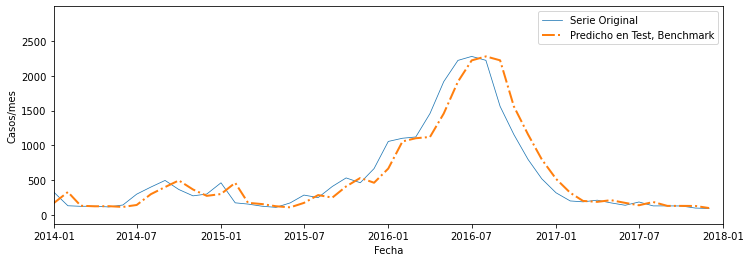

In [49]:
plt.figure(figsize=(12,4))
plt.plot(dengue_mensual.index[:length_total], dengue_mensual[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dengue_mensual.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(dengue_mensual.index[N_train+look_back], dengue_mensual.index[length_total])
plt.xlabel('Fecha')
plt.ylabel('Casos/mes')
plt.legend()
plt.show()

In [50]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE_benchmark = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])

In [51]:
print(f"La RMSE del benchmark es: {np.sqrt(MSE_benchmark)},\n mientras la del test de random forest es {np.sqrt(MSE_test)},\n es evidente que el benchmark tiene una ventaja, pero el modelo de machine learning es mucho más poderoso.")

La RMSE del benchmark es: 193.14718049542773,
 mientras la del test de random forest es 215.10156817962377,
 es evidente que el benchmark tiene una ventaja, pero el modelo de machine learning es mucho más poderoso.


___
## PARTE C - INVESTIGACIÓN
___

Finalmente, a modo de conclusión, espero para el proyecto 4 realizar un web scraping del "Sistema de Alerta Temprana de Medellín y el Valle de Aburrá" (SIATA) para obtener variables de precipitación y temperatura. La idea con esta información sería ajustar un modelo a variables climáticas y no a su autocorrelación en el tiempo.

Dado que el dengue es una enfermedad arboviral, y es considerada en las regiones tropicales (como es el caso de Medellín) como una enfermedad epidémica con brotes endémicos *(Martínez, 2008)*, lo más seguro es que el dengue responda a otras variables, como puede ser los fenómenos del niño y de la niña.

Existe un índice que mide el comportamiento de este fenómeno y esrecolectado por La Administración Nacional Oceánica y Atmosférica de los Estados Unidos (NOAA por sus siglas en inglés). El SOI (Southern Oscilation Index) representa una medida estandarizada de la diferencia de niveles de presión del mar entre Tahití, Polinesia Francesa y Darwin, Australia. El SOI indica una fluctuación de la presión del aire a gran escala entre el pacífico oriental y occidental. Por lo general valores negativos indican una condición cálida conocido como El Niño y valores positivos temperaturas más frías usualmente La Niña.

Para Medellín, *Hales et al. (1996)* encuentra que en los periodos de La Niña (valores positivos) hay un aumento de los casos, en el periodo de 1970 a 1996.

*Ceballos et al. (2020)* ajusta una red neuronal probablemente al mismo set de datos que estoy explorando y utiliza información del Instituto de Hidrología, Meteorología y Estudios Ambientales (IDEAM).

Se observa que hay evidencia para continuar analizando esta información. Espero poder en el próximo proyecto acercarme con más preguntas de la mano de variables que me ayuden a resolverlas. ¿Qué relación tiene las lluvias con la ocurrencia de dengue, o las temperaturas? y ¿qué tal el SOI?

## BIBLIOGRAFÍA

* Ceballos-Arroyo, A. M., Maldonado-Perez, D., Mesa-Yepes, H., Perez, L., Ciuoderis, K., Comach, G., ... & Branch-Bedoya, J. W. (2020, January). Towards a machine learning-based approach to forecasting Dengue virus outbreaks in Colombian cities: a case-study: Medellin, Antioquia. In 15th International Symposium on Medical Information Processing and Analysis (Vol. 11330, p. 1133016). International Society for Optics and Photonics.
* Hales S, Weinstein P, Woodward A. (1996). Dengue fever epidemics in the South Pacific: driven by El Niño Southern Oscillation? Lancet ;348(9042):1664–5.
* Martínez Torres, E. (2008). Dengue. Estudos avançados, 22(64), 33-52.